<a href="https://colab.research.google.com/github/sberniz/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
#Import Pandas, matplotlib.pyplot, and numpy
%matplotlib inline
import matplotlib.style as style
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [1]:
#Getting example to compare to 
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Part 1: REplicate Lesson CODE:

In [0]:
#Fake pd series
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

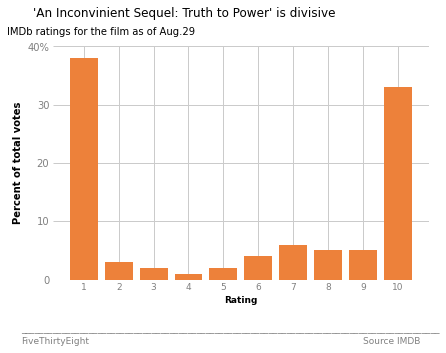

In [213]:

# Your Work Here
#Part 1 , Replicate Lesson Code
#Set Style
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots() #call subplot on fig
fig.patch.set_color('white')
#put bar on the graph
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake,color='#ED813A', width=0.8)

#background/face color
ax.set_facecolor('white')

#Y axis Tick marks and tick labels
ax.set_yticks(range(0,50,10))
ax.set_yticklabels([0,10,20,30,'40%'],fontsize=10,color='grey')

#X axis tick marks and labels
ax.set_xticks(range(1,11,1))
ax.set_xticklabels(range(1,11,1),fontsize=9,color='gray')

#X axis label
ax.set_xlabel('Rating',fontsize=9,fontweight='bold')
#Y axis label
ax.set_ylabel('Percent of total votes',fontsize=10,fontweight='bold')

#Graph title
ax.set_title('\'An Inconvinient Sequel: Truth to Power\' is divisive', fontweight='100',fontsize='12',x=0.35,y=1.1,linespacing=1.5, fontname='Arial Black')
#GraphSubtitle
ax.text(s='IMDb ratings for the film as of Aug.29',x=-1.2,y=42,fontsize=10)

#remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.text(s='FiveThirtyEight', y=-11,x=-0.8,fontsize=9,color='gray')
ax.text(s='Source IMDB', y=-11,x=9,fontsize=9,color='gray')
ax.text(s=('_' * 93), y=-9, x=-0.8, fontsize=9, color='gray')

plt.show()

In [30]:
display(example)

part 2 mimic 538


In [161]:
imgurl = 'https://fivethirtyeight.com/wp-content/uploads/2020/05/ATD.Paine_.ECONOMIST-SURVEY.0526-1.png?w=1150'
example2 = Image(url=imgurl, width=400)
display(example2)

In [0]:
fake2 = pd.Series([0,11,17,18,21,33],index=range(1,7))


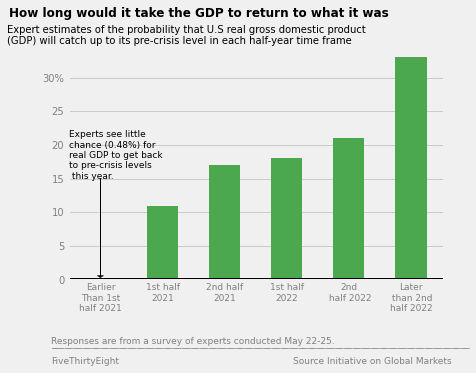

In [284]:

fig2, ax2 = plt.subplots() #call subplot on fig
#Bar Plot
ax2.bar(x=['Earlier\nThan 1st\nhalf 2021','1st half\n2021','2nd half\n2021','1st half\n2022','2nd\n half 2022','Later\n than 2nd\nhalf 2022'], height=fake2,width=0.5,color='#4CA84E')
#title
ax2.set_title('How long would it take the GDP to return to what it was',fontsize=12,fontweight='bold',x=0.35,y=1.1)
#subtitle
ax2.text(s='Expert estimates of the probability that U.S real gross domestic product\n(GDP) will catch up to its pre-crisis level in each half-year time frame',x=-1.5,y=35,fontsize=10)
ax2.text(s='Experts see little\nchance (0.48%) for\nreal GDP to get back\nto pre-crisis levels\n this year.',x=-0.5,y=15,fontsize=9)
#setting yticks
ax2.set_yticks(range(0,35,5))
ax2.set_yticklabels([0,5,10,15,20,25,'30%'],fontsize=10,color='grey')
#setting x ticks
ax2.set_xticks(['Earlier\nThan 1st\nhalf 2021','1st half\n2021','2nd half\n2021','1st half\n2022','2nd\n half 2022','Later\n than 2nd\nhalf 2022'])
ax2.set_xticklabels(['Earlier\nThan 1st\nhalf 2021','1st half\n2021','2nd half\n2021','1st half\n2022','2nd\n half 2022','Later\n than 2nd\nhalf 2022'],fontsize=9,color='gray')
#bottom line and info
ax2.text(s=('Responses are from a survey of experts conducted May 22-25.'), y=-9.5, x=-0.8, fontsize=9, color='gray')
ax2.text(s=('_'*93), y=-10, x=-0.8, fontsize=9, color='gray')
ax2.text(s='FiveThirtyEight', y=-12.5,x=-0.8,fontsize=9,color='gray')
ax2.text(s='Source Initiative on Global Markets', y=-12.5,x=3.1,fontsize=9,color='gray')
#remove vertical grid
ax2.xaxis.grid(False)
#ad line
ax2.arrow(0, 15, 0, -14.4, head_width=0.1, head_length=0.3, fc='k', ec='k')
#ax2.arrow(x=0,y=0.4,dx=0,dy=-0.3,linewidth=0.8)
ax2.axhline(y=0, xmin=0, xmax=1,color='black')
#ax2.axvline(x=0,ymin=0.02,ymax=0.4,color='black',linewidth=0.6)
plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here